In [14]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt

from invisible_cities.database.load_db import DataPMT

In [76]:
%matplotlib inline

plt.rcParams["figure.figsize"] = 9.75, 8
plt.rcParams[  "font.size"   ] = 28
plt.rcParams["axes.formatter.limits"] = 0, 4
plt.rcParams[   "axes.formatter.use_mathtext"] = True
plt.rcParams[   "grid.linewidth"             ] = 2
plt.rcParams[   "grid.linestyle"             ] = "--"
plt.rcParams[   "grid.alpha"                 ] = 0.8


In [77]:
df = pd.read_hdf("/Users/Gonzalo/Downloads/trigger4734.h5", "df")
df["Z"] = df.S2t - df.S1t

gains = np.abs(DataPMT(4734).adc_to_pes.values)

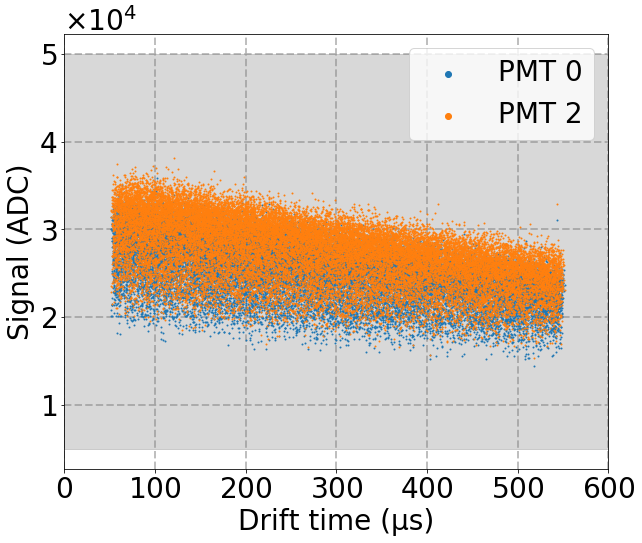

In [79]:
plt.fill_between(np.linspace(0, 600, 100), np.full(100, 5e3), np.full(100, 5e4), color="gray", alpha=0.3, zorder=2)
plt.scatter(df.Z, df.PMT0_e * gains[0], s=1, label="PMT 0", zorder=3)
plt.scatter(df.Z, df.PMT2_e * gains[2], s=1, label="PMT 2", zorder=4)

plt.xlim(0, 600)
plt.xlabel("Drift time (µs)")
plt.ylabel("Signal (ADC)")
plt.legend(markerscale=6)
plt.grid(zorder=1)

plt.savefig("/Users/Gonzalo/github/papers/KrRunII/imgKr/trigger_pmts02.png", dpi=300)